In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
data=pd.read_csv('diabdata.csv')
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54


In [3]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
dtype: object

In [4]:
print(data.isna().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


In [5]:
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


In [6]:
print(data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  768.000000                768.000000  768.000000  
mean    31.992578                  0.471876   33.240885  
std      7.884160                  0.331329   11.760232  
min      0.000000                  0.078000   21.000000  
25%     27.300000        

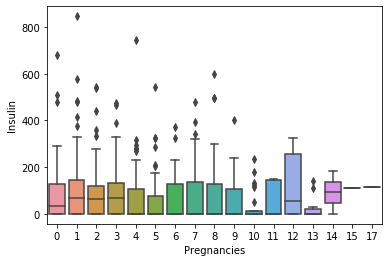

In [35]:
sns.boxplot(x='Pregnancies',y='Insulin',data=data)

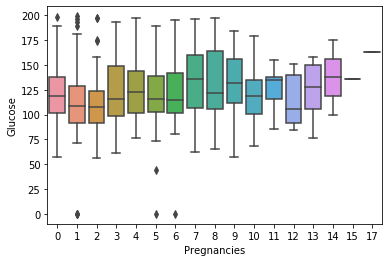

In [29]:
sns.boxplot(x='Pregnancies',y='Glucose',data=data)

In [7]:
cor=data.corr()
print(cor)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805    

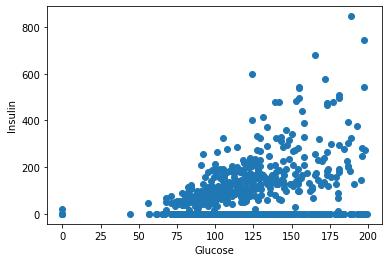

In [8]:
plt.scatter(data['Glucose'], data['Insulin'])
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.show()

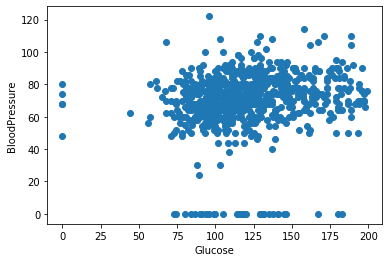

In [9]:
plt.scatter(data['Glucose'], data['BloodPressure'])
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.show()

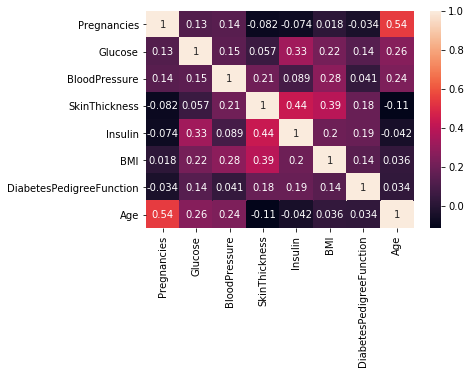

In [36]:
sns.heatmap(cor,annot=True)

In [10]:
from sklearn.preprocessing import StandardScaler
mms=StandardScaler()
mms.fit(data)
normaldata=mms.transform(data)

In [11]:
from sklearn.decomposition import PCA
pca_reducer = PCA(n_components=2)
data1 = pca_reducer.fit_transform(normaldata)

In [37]:
data1.shape

(768, 2)

In [12]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(data1)
    kmeanModel.fit(data1)
    distortions.append(sum(np.min(cdist(data1, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / data1.shape[0])
    inertias.append(kmeanModel.inertia_)
    mapping1[k] = sum(np.min(cdist(data1, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / data1.shape[0]
    mapping2[k] = kmeanModel.inertia_

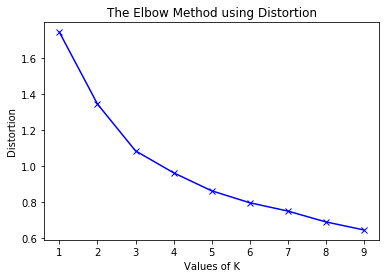

In [13]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

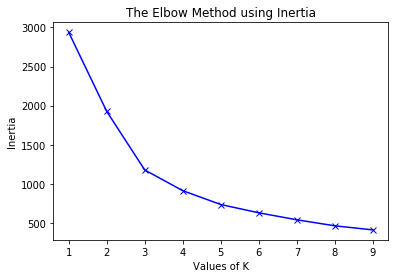

In [14]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [23]:
km = KMeans(n_clusters= 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
cluster = km.fit_predict(data1)
#plt.scatter(data1[:, 0], data1[:, 1], label='Datapoints')
#plt.scatter(cluster.cluster_centers_[:, 0], cluster.cluster_centers_[:, 1], label='Clusters')
#plt.title("Sklearn version of KMeans")
#plt.legend()
#plt.show()

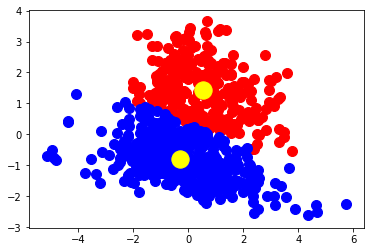

In [25]:
plt.scatter(data1[cluster == 0, 0], data1[cluster == 0,1],s = 100, c='red', label = 'Cluster 1')
plt.scatter(data1[cluster == 1, 0], data1[cluster == 1,1],s = 100, c='blue', label = 'Cluster 2')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')